# TPE - FUNDAMENTOS DE LA CIENCIA DE DATOS - 2025 
## ONLINE SHOPPERS INTENTION DATASET

Autores: Cisilino Bautista y Abraham Simon

#### Apertura y analisis preeliminar del dataset.

In [674]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import shapiro
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from scipy.stats import mannwhitneyu
from scipy.stats import levene
from scipy.stats import kruskal



# leemos los datos del archivo
dataset_compras = pd.read_csv("online_shoppers_intention.csv")
dataset_compras.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Mostramos los primeros 5 registros/muestras del dataset, para ver con que variables nos encontrabamos, el tipo y los posibles valores que podrian tomar.

In [675]:
dataset_compras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [676]:
dataset_compras.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


Graficamos la variable mas importante del dataset para ver como se distribuye

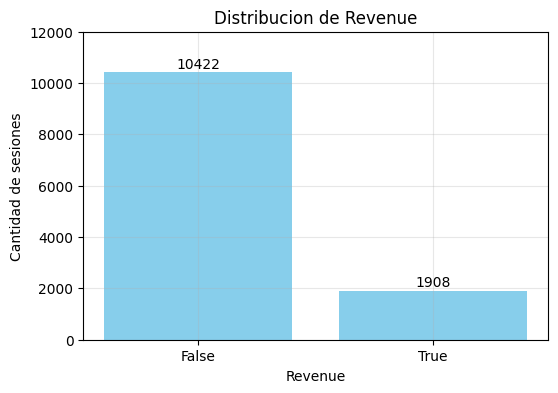



En porcentajes:
Revenue
False    84.53%
True     15.47%
Name: proportion, dtype: object


In [677]:
# Contar valores
counts = dataset_compras["Revenue"].value_counts().sort_index()

# Graficar
plt.figure(figsize=(6, 4))
bars = plt.bar(counts.index.astype(str), counts.values,color = ["skyblue"])
plt.title(f"Distribucion de Revenue")
plt.ylabel("Cantidad de sesiones")
plt.xlabel("Revenue")
plt.xticks(rotation=0)
plt.ylim(0, 12000) 
# etiquetas de valor encima de las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 50,
             f"{int(height)}", ha="center", va="bottom", fontsize=10)

plt.grid(True, alpha=0.3)
plt.show()
print("\n")
print("En porcentajes:")
porcentajes = round(dataset_compras["Revenue"].value_counts(normalize=True) * 100, 2)
print(porcentajes.astype(str) + "%")

Continuamos graficando las variables categoricas (codificadas como numericas) del dataset para concocer sus posibles valores :

- OperatingSystems

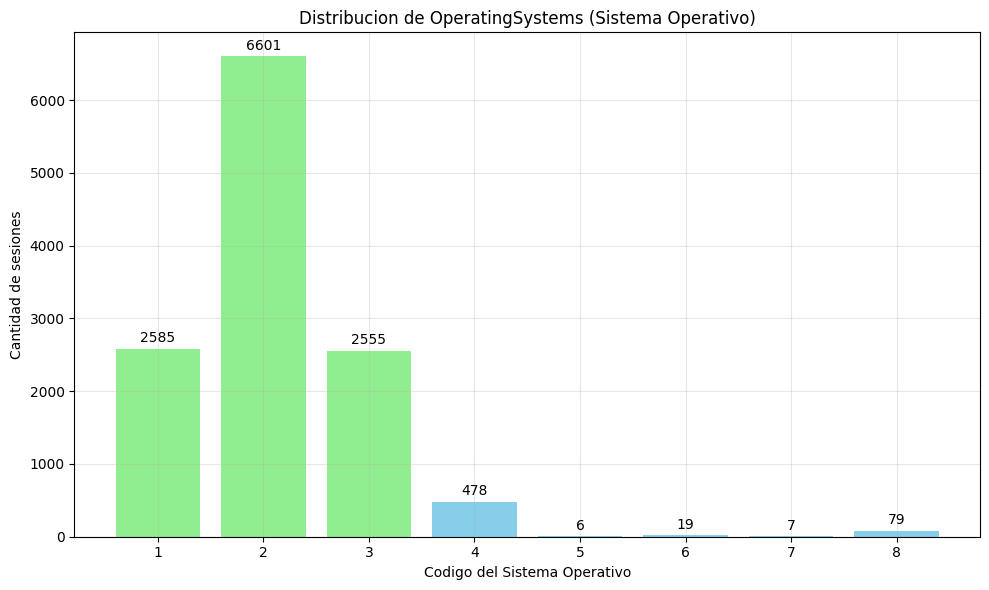

In [678]:

# Contar frecuencias
os_counts = dataset_compras["OperatingSystems"].value_counts().sort_index()

# Graficar en barras verticales
plt.figure(figsize=(10, 6))
bars = plt.bar(os_counts.index.astype(str), os_counts.values, color = ["skyblue"])
plt.title("Distribucion de OperatingSystems (Sistema Operativo)")
plt.xlabel("Codigo del Sistema Operativo")
plt.ylabel("Cantidad de sesiones")
plt.xticks(rotation=0)

bars = plt.bar(os_counts.index.astype(str), os_counts.values, color="skyblue")
for b in bars[:3]:
    b.set_facecolor("lightgreen")

# etiquetas de valor encima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 50,
             f"{int(height)}", ha="center", va="bottom", fontsize=10)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


- TrafficType

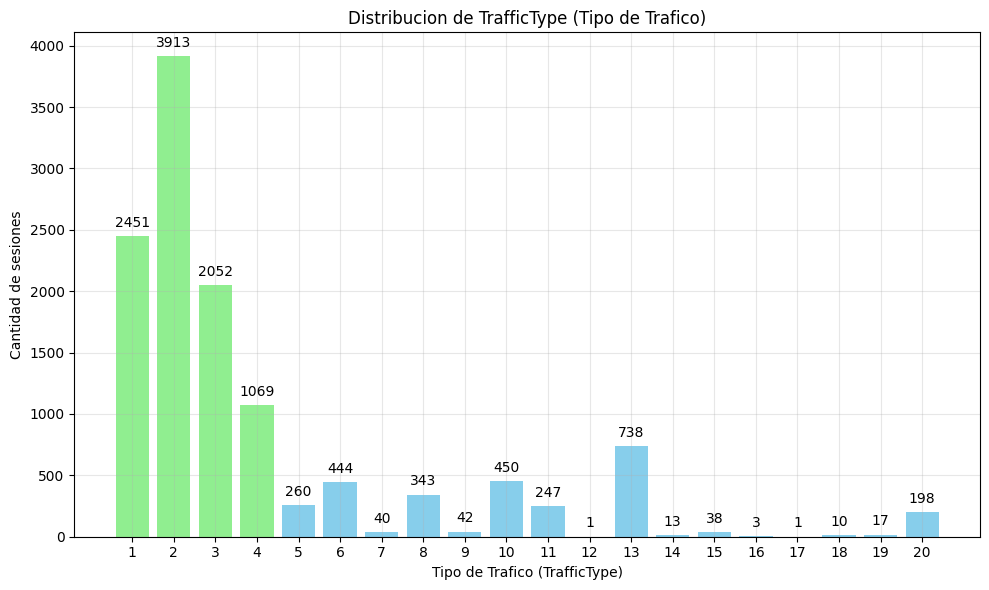

In [679]:
# Contar frecuencias
traffic_counts = dataset_compras["TrafficType"].value_counts().sort_index()

# Graficar en barras verticales
plt.figure(figsize=(10, 6))
bars = plt.bar(traffic_counts.index.astype(str), traffic_counts.values, color = ["skyblue"])
plt.title("Distribucion de TrafficType (Tipo de Trafico)")
plt.xlabel("Tipo de Trafico (TrafficType)")
plt.ylabel("Cantidad de sesiones")
plt.xticks(rotation=0)

# pintamos las primeras 4 barras que son las mas significativas.
bars = plt.bar(traffic_counts.index.astype(str), traffic_counts.values, color="skyblue")
for b in bars[:4]:
    b.set_facecolor("lightgreen")

# etiquetas de valor encima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 50,
             f"{int(height)}", ha="center", va="bottom", fontsize=10)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


- Region

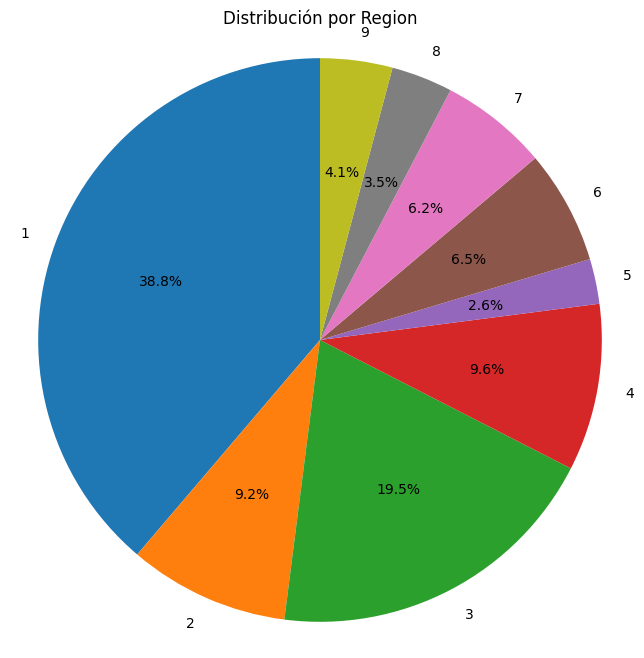

In [680]:

# Contar frecuencias
region_counts = dataset_compras["Region"].value_counts().sort_index()

# Graficar
plt.figure(figsize=(8, 8))
plt.pie(region_counts.values, labels=region_counts.index.astype(str), autopct="%1.1f%%", startangle=90)
plt.title("Distribución por Region")
plt.axis("equal") 
plt.show()

- Browser

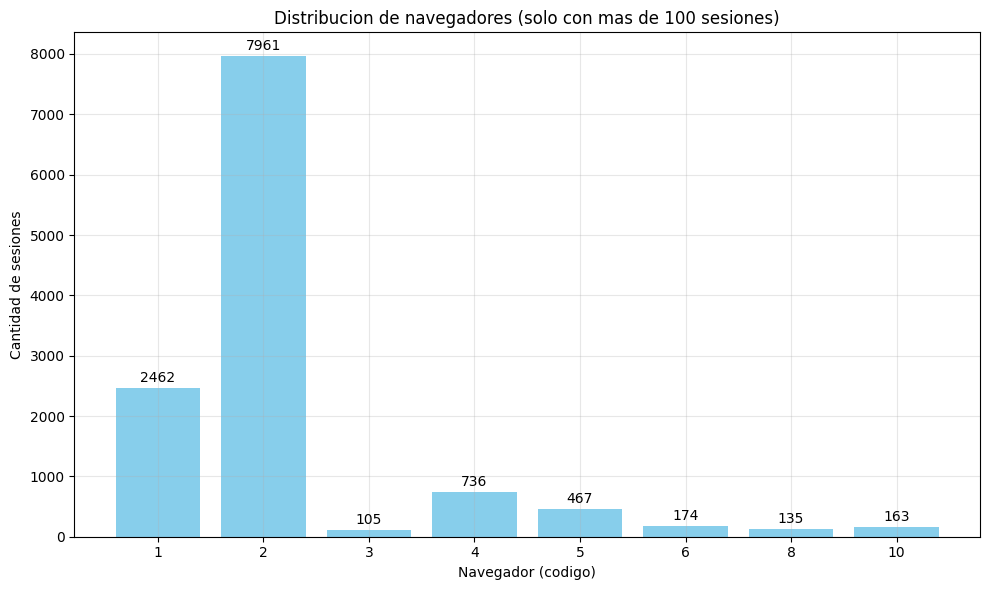

In [681]:

# Contar frecuencias
browser_counts = dataset_compras["Browser"].value_counts().sort_index()
# Filtrar solo los navegadores con más de 100 sesiones
browser_significativos = browser_counts[browser_counts > 100]

# Graficar
plt.figure(figsize=(10, 6))
bars = plt.bar(browser_significativos.index.astype(str), browser_significativos.values, color = ["skyblue"])
plt.title("Distribucion de navegadores (solo con mas de 100 sesiones)")
plt.xlabel("Navegador (codigo)")
plt.ylabel("Cantidad de sesiones")
plt.xticks(rotation=0)

# etiquetas de valor encima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 50,
             f"{int(height)}", ha="center", va="bottom", fontsize=10)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


- Weekend

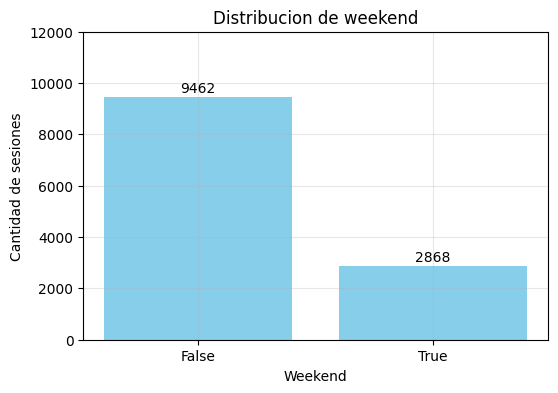



En porcentajes:
Weekend
False    76.74%
True     23.26%
Name: proportion, dtype: object


In [682]:

# Contar valores
counts = dataset_compras["Weekend"].value_counts().sort_index()

# Graficar
plt.figure(figsize=(6, 4))
bars = plt.bar(counts.index.astype(str), counts.values, color = ["skyblue"])
plt.title(f"Distribucion de weekend")
plt.ylabel("Cantidad de sesiones")
plt.xlabel("Weekend")
plt.xticks(rotation=0)
plt.ylim(0, 12000) 
# etiquetas de valor encima de las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 50,
             f"{int(height)}", ha="center", va="bottom", fontsize=10)

plt.grid(True, alpha=0.3)
plt.show()
print("\n")
print("En porcentajes:")
porcentajes = round(dataset_compras["Weekend"].value_counts(normalize=True) * 100, 2)
print(porcentajes.astype(str) + "%")

- Month

que meses estan codificados?

In [683]:
dataset_compras["Month"].value_counts()

Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64

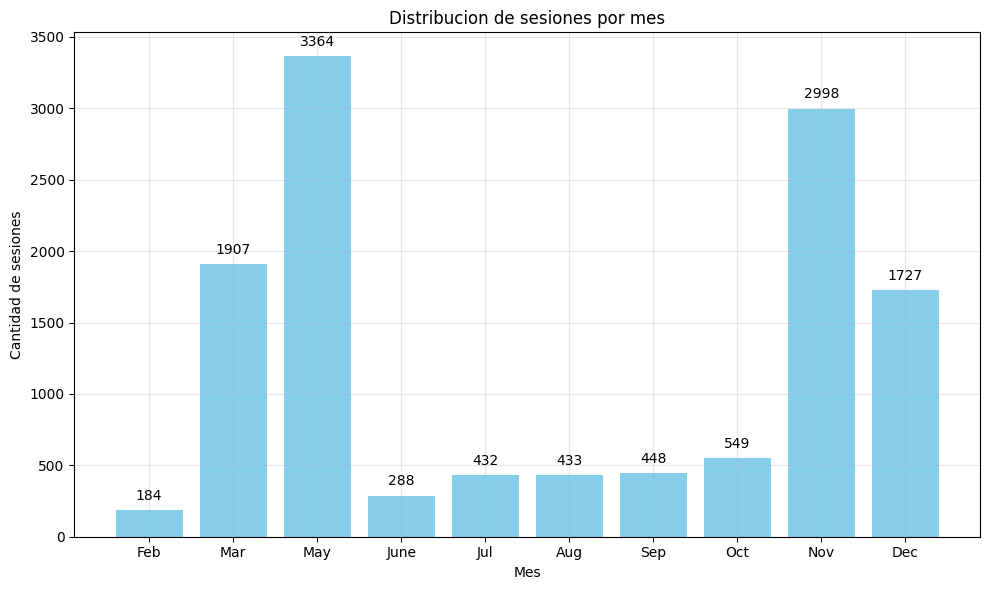

In [684]:
# Contar frecuencias por mes
month_counts = dataset_compras["Month"].value_counts().reindex([
    "Feb", "Mar", "May", "June", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
], fill_value=0)

# Graficar
plt.figure(figsize=(10, 6))
bars = plt.bar(month_counts.index, month_counts.values, color = ["skyblue"])
plt.title("Distribucion de sesiones por mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad de sesiones")
plt.xticks(rotation=0)

# etiquetas de valor encima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 50,
             f"{int(height)}", ha="center", va="bottom", fontsize=10)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


- ExitRates

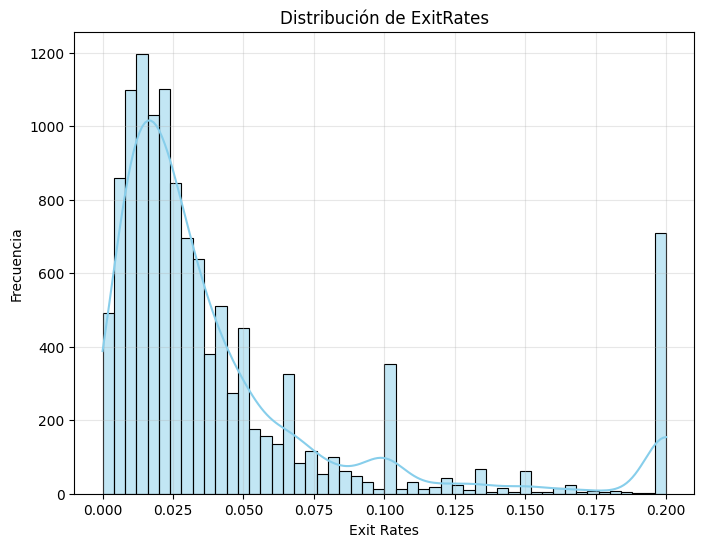

In [685]:
# Grafico de densidad (KDE) + histograma
plt.figure(figsize=(8, 6))
sns.histplot(dataset_compras["ExitRates"], kde=True, color="skyblue", bins=50)
plt.title("Distribución de ExitRates")
plt.xlabel("Exit Rates")
plt.ylabel("Frecuencia")
plt.grid(True, alpha=0.3)
plt.show()

- BounceRates

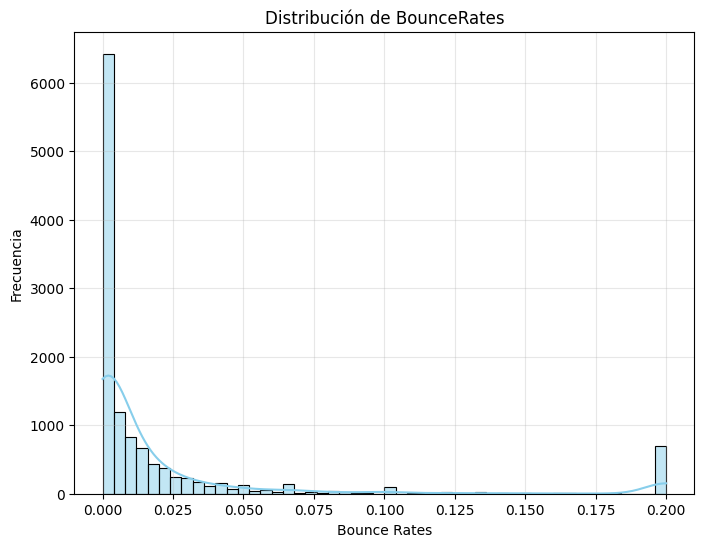

In [686]:
# Grafico de densidad (KDE) + histograma
plt.figure(figsize=(8, 6))
sns.histplot(dataset_compras["BounceRates"], kde=True, color="skyblue", bins=50)
plt.title("Distribución de BounceRates")
plt.xlabel("Bounce Rates")
plt.ylabel("Frecuencia")
plt.grid(True, alpha=0.3)
plt.show()

- PageValues

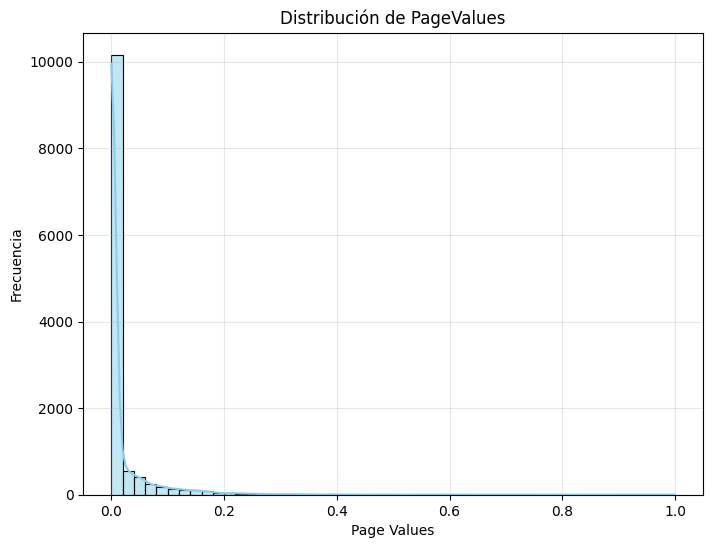

In [687]:
plt.figure(figsize=(8, 6))
sns.histplot(df["PageValues"], kde=True, color="skyblue", bins=50)
plt.title("Distribución de PageValues")
plt.xlabel("Page Values")
plt.ylabel("Frecuencia")
plt.grid(True, alpha=0.3)
plt.show()

- Administrative y Administrative_Duration

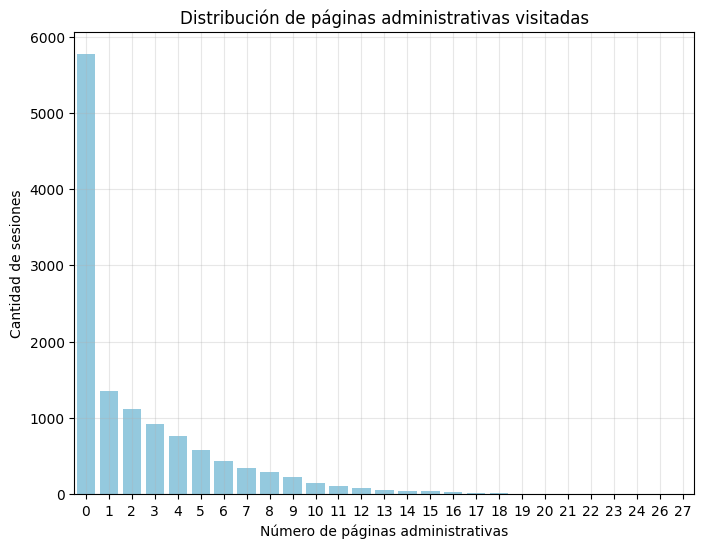

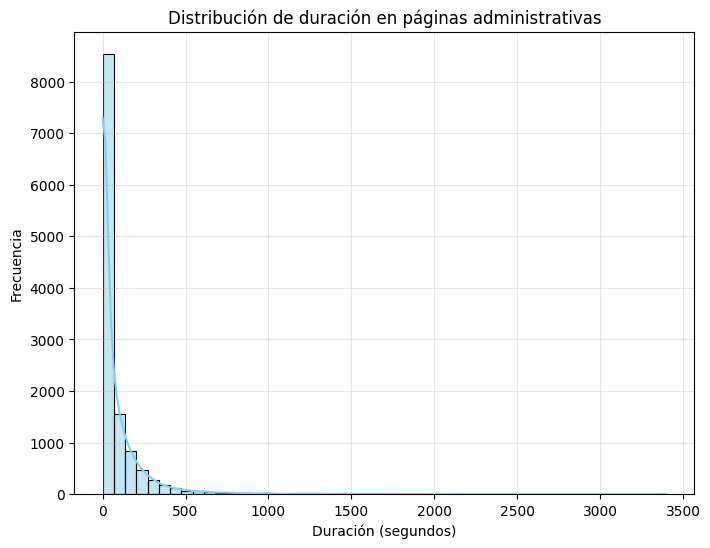

In [688]:
# Gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset_compras, x="Administrative", color="skyblue")
plt.title("Distribución de páginas administrativas visitadas")
plt.xlabel("Número de páginas administrativas")
plt.ylabel("Cantidad de sesiones")
plt.xticks(rotation=0)  # Para que se vean bien los números
plt.grid(True, alpha=0.3)
plt.show()

# Gráfico de densidad + histograma 
plt.figure(figsize=(8, 6))
sns.histplot(dataset_compras["Administrative_Duration"], kde=True, color="skyblue", bins=50)
plt.title("Distribución de duración en páginas administrativas")
plt.xlabel("Duración (segundos)")
plt.ylabel("Frecuencia")
plt.grid(True, alpha=0.3)
plt.show()

- Informational y Informational_Duration

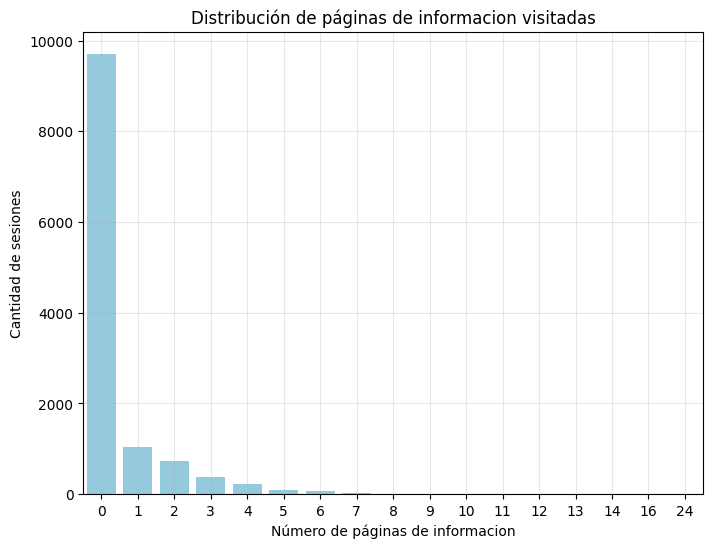

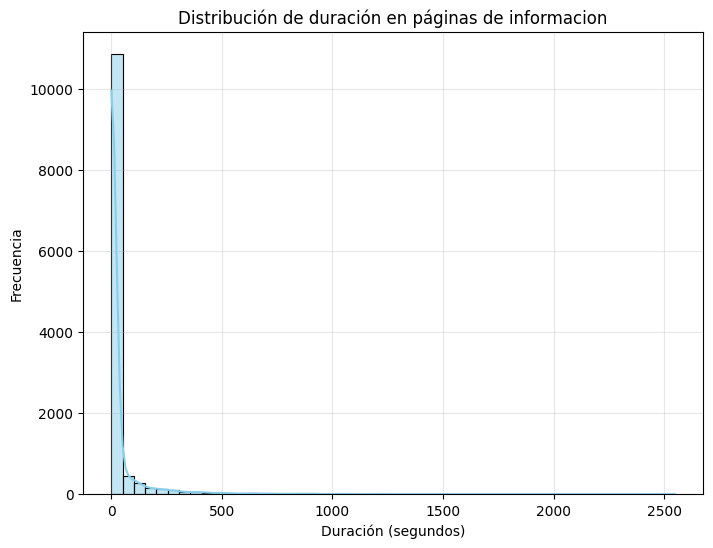

In [689]:
# Gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset_compras, x="Informational", color="skyblue")
plt.title("Distribución de páginas de informacion visitadas")
plt.xlabel("Número de páginas de informacion")
plt.ylabel("Cantidad de sesiones")
plt.xticks(rotation=0)  # Para que se vean bien los números
plt.grid(True, alpha=0.3)
plt.show()

# Gráfico de densidad + histograma 
plt.figure(figsize=(8, 6))
sns.histplot(dataset_compras["Informational_Duration"], kde=True, color="skyblue", bins=50)
plt.title("Distribución de duración en páginas de informacion")
plt.xlabel("Duración (segundos)")
plt.ylabel("Frecuencia")
plt.grid(True, alpha=0.3)
plt.show()

- ProductRelated y ProductRelated_Duration

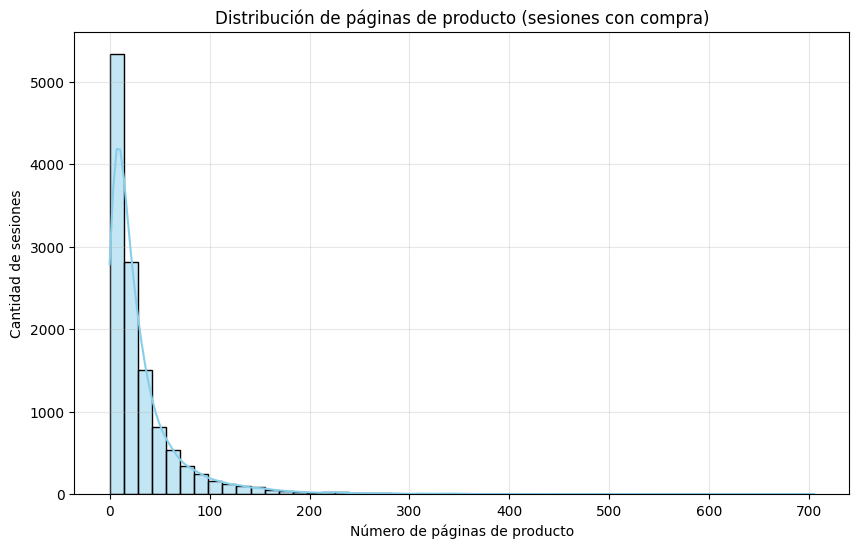

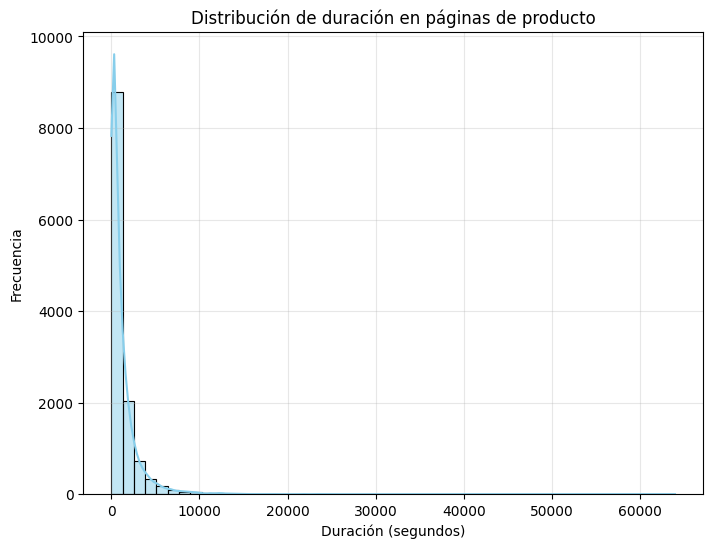

In [ ]:
# Histograma con bins
plt.figure(figsize=(10, 6))
sns.histplot(dataset_compras['ProductRelated'], bins=50, color='skyblue', kde=True)
plt.title('Distribución de páginas de producto')
plt.xlabel('Número de páginas de producto')
plt.ylabel('Cantidad de sesiones')
plt.grid(True, alpha=0.3)
plt.show()

# Gráfico de densidad + histograma 
plt.figure(figsize=(8, 6))
sns.histplot(dataset_compras["ProductRelated_Duration"], kde=True, color="skyblue", bins=50)
plt.title("Distribución de duración en páginas de producto")
plt.xlabel("Duración (segundos)")
plt.ylabel("Frecuencia")
plt.grid(True, alpha=0.3)
plt.show()

#### Limpieza y pre-procesamiento
- eliminacion de repetidos

In [691]:
# Eliminar duplicados (exactamente los mismos valores en cada columna)
df = dataset_compras.drop_duplicates(keep="first")
print(f"Se eliminaron {len(dataset_compras) - len(df)} registros duplicados")

Se eliminaron 125 registros duplicados


- conversion de variables cuantitativa a categoricas (OperatingSystem, Browser, Region, TrafficType)

In [692]:
# Conversion de cuantitativas a categoricas.
categoricas = ["OperatingSystems", "Browser", "Region", "TrafficType"]
for col in categoricas:
    df.loc[:, col] = df[col].astype("category")


- correccion de inconsistencias con imputacion de valores por media

In [693]:
df = df.copy()
    
# Imputacion de valores inconsistentes por media (ponderada luego)
for tipo_pagina in ["Administrative", "Informational", "ProductRelated"]:
    duration = f"{tipo_pagina}_Duration"

    # Identificar inconsistencias
    inconsistencias = (df[tipo_pagina] > 0) & (df[duration] == 0)
    if inconsistencias.sum() > 0: 
        duracion_promedio = df[ (df[tipo_pagina] > 0) & (df[duration] > 0) ][duration].mean()
            
        # Para todas las filas donde inconsistencias sea True, en la columna duration, asigna el nuevo valor.
        df.loc[inconsistencias, duration] = duracion_promedio * 0.5

- dos columnas booleanas cambiadas a binarias

In [694]:
# Convertir booleanos a binarios.
df["Weekend"] = df["Weekend"].astype(int)
df["Revenue"] = df["Revenue"].astype(int)

#### Planteo de Hipotesis : Univariadas

##### Hipotesis 1 : “La gran mayoría de las sesiones ocurren en fechas cercanas a dias festivos (SpecialDay = 0), lo que indica que el tráfico está fuertemente impulsado por las oportunidades de mercado relacionadas a estas fechas.” 

Total de sesiones: 12205
Sesiones con SpecialDay = 0: 10956
Proporcion de sesiones cerca de dias festivos: 89.8%

Distribucion de SpeialDay:
SpecialDay
0.0    10956
0.2      178
0.4      243
0.6      350
0.8      324
1.0      154
Name: count, dtype: int64


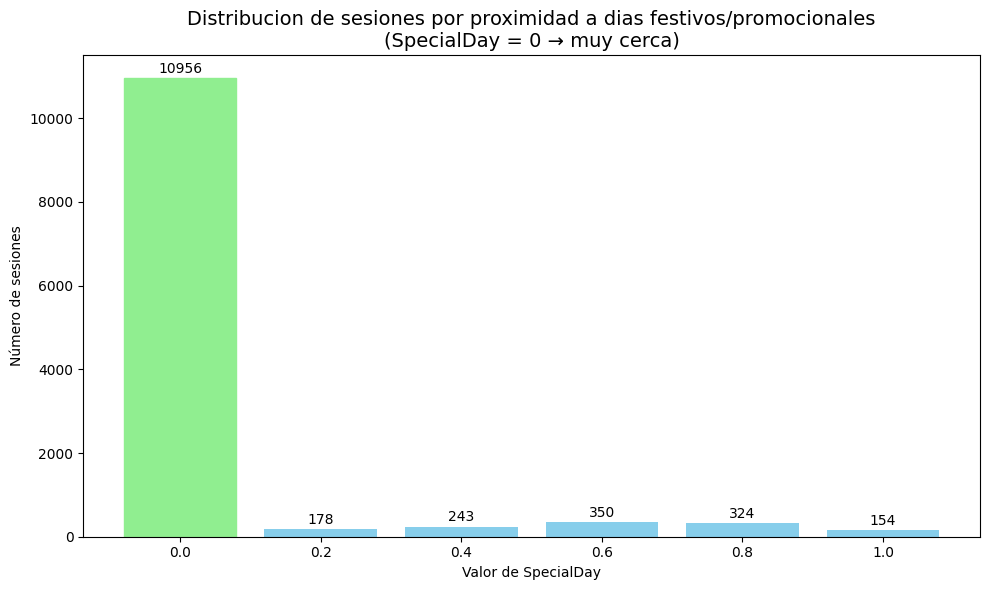

In [695]:
# Proporcin de sesiones con SpecialDay = 0 (cerca de día festivo)
prop_cerca_festivo = (df["SpecialDay"] == 0).mean()
total_sesiones = len(df)
specialday_counts = df["SpecialDay"].value_counts().sort_index()
print(f"Total de sesiones: {total_sesiones}")
print(f"Sesiones con SpecialDay = 0: {(df["SpecialDay"] == 0).sum()}")
print(f"Proporcion de sesiones cerca de dias festivos: {prop_cerca_festivo:.1%}")

print("\nDistribucion de SpeialDay:")
print(df["SpecialDay"].value_counts().sort_index())


# Crear grafico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(specialday_counts.index.astype(str), specialday_counts.values, color="skyblue")
plt.title("Distribucion de sesiones por proximidad a dias festivos/promocionales\n(SpecialDay = 0 → muy cerca)", fontsize=14)
plt.xlabel("Valor de SpecialDay")
plt.ylabel("Número de sesiones")
plt.xticks(rotation=0)

# etiquetas de valor encima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 50,
             f"{int(height)}", ha="center", va="bottom", fontsize=10)

# Resaltar la barra de SpecialDay = 0
bars[0].set_color("lightgreen")

plt.tight_layout()
plt.show()


##### Hipotesis 2 : "La mayoría de las compras están asociadas a sesiones de usuarios que ya visitaron el sitio y tienen experiencia previa"



COMPRAS REALIZADAS POR TIPO DE VISITANTE
Returning_Visitor: 1470 compras (77.0%)
New_Visitor: 422 compras (22.1%)
Other: 16 compras (0.8%)

TOTAL: 1908 compras analizadas


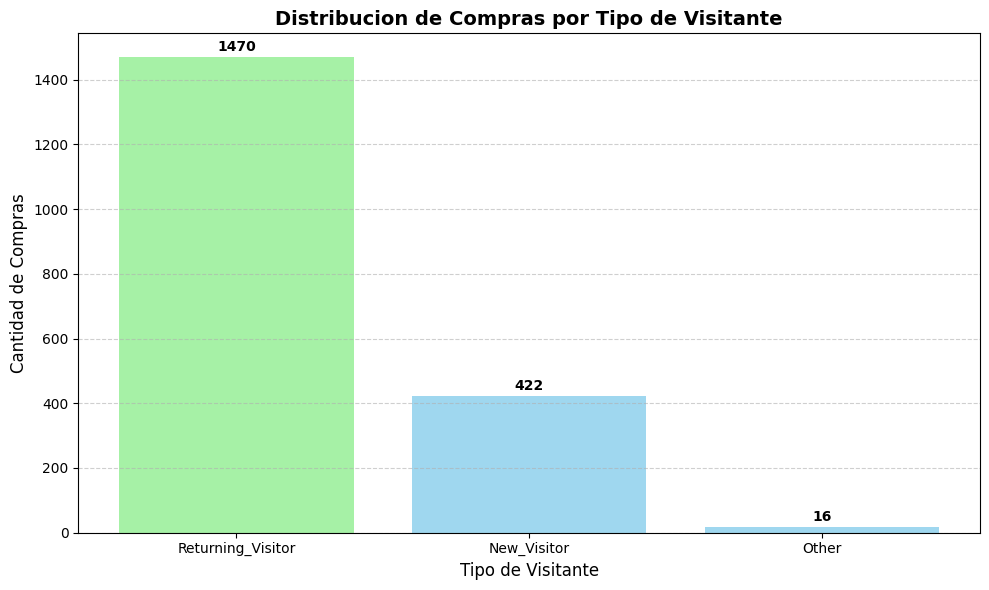

In [696]:
#Filtrar solo las sesiones que resultaron en compra
compras_df = df[df["Revenue"] == True]

# Contar las compras por tipo de visitante
compras_por_tipo = compras_df["VisitorType"].value_counts()
total_compras = len(compras_df)

print("COMPRAS REALIZADAS POR TIPO DE VISITANTE")

for tipo, cantidad in compras_por_tipo.items():
    porcentaje = (cantidad / total_compras) * 100
    print(f"{tipo}: {cantidad} compras ({porcentaje:.1f}%)")

print(f"\nTOTAL: {total_compras} compras analizadas")

# Crear el grafico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(compras_por_tipo.index, compras_por_tipo.values, color=["lightgreen", "skyblue", "skyblue"], alpha=0.8)

# etiquetas de valor
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height + 10,
             f"{int(height)}",
             ha="center", va="bottom",
             fontweight="bold")

plt.title("Distribucion de Compras por Tipo de Visitante", fontsize=14, fontweight="bold")
plt.xlabel("Tipo de Visitante", fontsize=12)
plt.ylabel("Cantidad de Compras", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


#### Planteo de Hipotesis : Bivariadas

##### Hipótesis 3 : El ultimo trimestre del anio es donde se registran mas sesiones finalizadas en compra.


- Test de chi-cuadrado de bondad de ajuste. Lo esperado es que las distribuciones sean iguales.


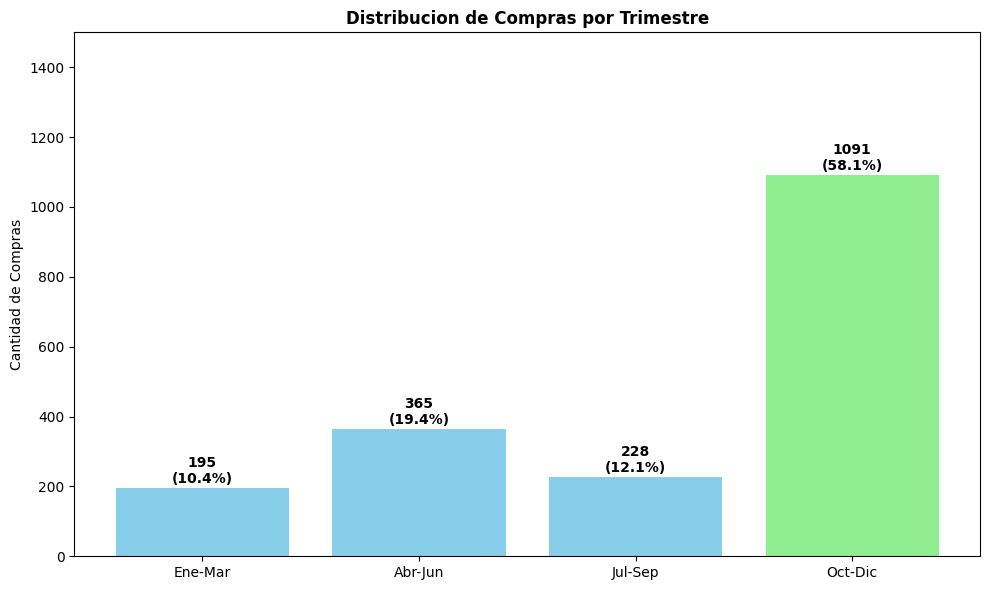

In [697]:
# definir trimestres
trimestre_map = {
    "Jan": "Ene-Mar", "Feb": "Ene-Mar", "Mar": "Ene-Mar",
    "Apr": "Abr-Jun", "May": "Abr-Jun", "Jun": "Abr-Jun", 
    "Jul": "Jul-Sep", "Aug": "Jul-Sep", "Sep": "Jul-Sep",
    "Oct": "Oct-Dic", "Nov": "Oct-Dic", "Dec": "Oct-Dic"
}

# Agrupar compras por trimestre
compras_trimestre = df[df["Revenue"] == True]["Month"].map(trimestre_map).value_counts().reindex(["Ene-Mar", "Abr-Jun", "Jul-Sep", "Oct-Dic"])
porcentajes = (compras_trimestre / compras_trimestre.sum() * 100).round(1)

plt.figure(figsize=(10, 6))
bars = plt.bar(compras_trimestre.index, compras_trimestre.values, color=["skyblue", "skyblue", "skyblue", "lightgreen"])
plt.title("Distribucion de Compras por Trimestre", fontweight="bold")
plt.ylabel("Cantidad de Compras")
plt.ylim(0, 1500)

for bar, valor, porcentaje in zip(bars, compras_trimestre.values, porcentajes.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
             f"{valor}\n({porcentaje}%)", ha="center", va="bottom", fontweight="bold")
plt.tight_layout()
plt.show()


In [698]:
# test
print(f"\nTEST CHI-CUADRADO:")
print("="*30)

# Esperado: distribucion uniforme = 25% cada trimestre
esperado = [compras_trimestre.sum() / 4] * 4
observado = compras_trimestre.values

chi2, p_value = stats.chisquare(observado, esperado)

print(f"Estadistico: {chi2:.4f}")
print(f"p-value: {p_value:.6f}")
print(f"Nivel de significancia alfa = 0.05")


print(f"\nCONCLUSION:")
if p_value < 0.05:
    print("Se RECHAZA la hipotesis nula")
    print("Existen diferencias significativas entre trimestres")

else:
    print("NO se rechaza la hipotesis nula")
    print("NO hay diferencias significativas entre trimestres")




TEST CHI-CUADRADO:
Estadistico: 1130.0793
p-value: 0.000000
Nivel de significancia alfa = 0.05

CONCLUSION:
Se RECHAZA la hipotesis nula
Existen diferencias significativas entre trimestres


##### Hipotesis 4: "Entre las sesiones que resultaron en compra, y un alto valor de PageValues se corresponde con que se visitaron muchas paginas o hubo una exploracion profunda del sitio"

Las sesiones de compra valiosas (alto PageValues) se caracterizan por una exploracion profunda del sitio (valor alto de ProductRelated)




Correlacion (Pearson) entre PageValues y ProductRelated (solo compras): -0.1778


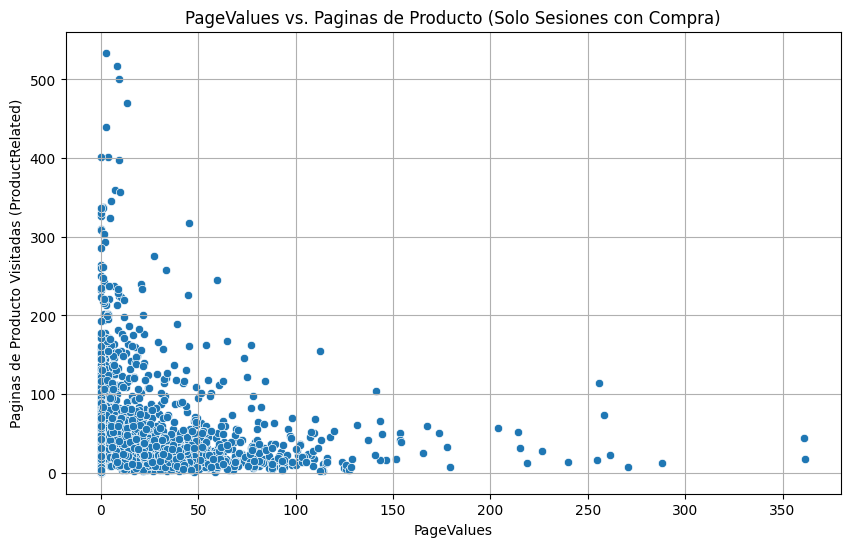

In [699]:
df_compra = df[df["Revenue"] == 1].copy()

correlacion = df_compra["PageValues"].corr(df_compra["ProductRelated"])
print(f"Correlacion (Pearson) entre PageValues y ProductRelated (solo compras): {correlacion:.4f}")

# scatter-plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_compra, x="PageValues", y="ProductRelated")
plt.title("PageValues vs. Paginas de Producto (Solo Sesiones con Compra)")
plt.xlabel("PageValues")
plt.ylabel("Paginas de Producto Visitadas (ProductRelated)")
plt.grid(True)





Correlacion Spearman (PageValues vs ProductRelated): -0.2089


Text(0, 0.5, 'Paginas de Producto Visitadas')

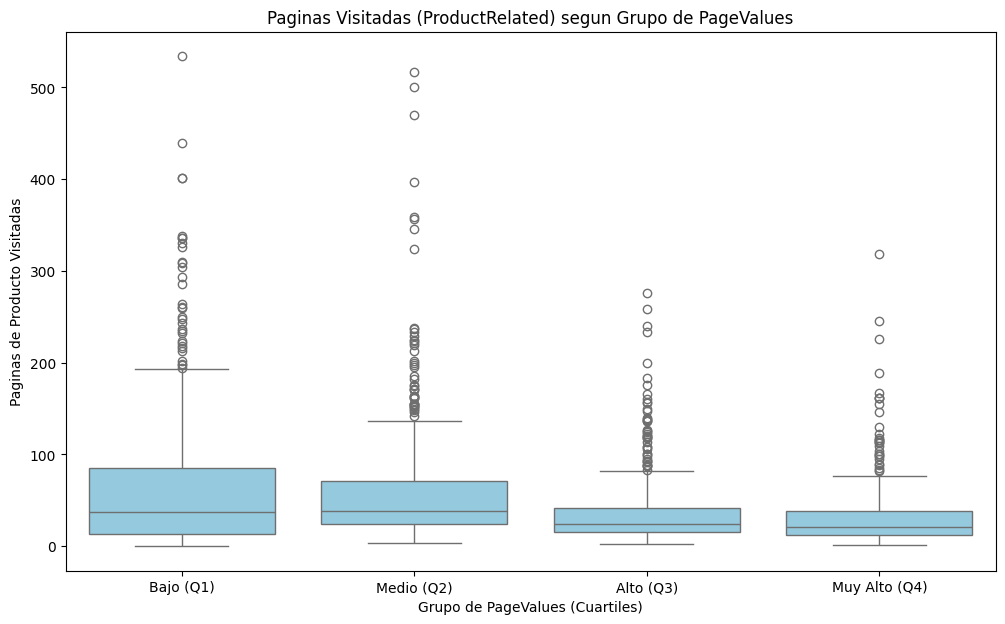

In [700]:
# corr Spearman: PageValues vs. ProductRelated
corr_paginas_s = df_compra["PageValues"].corr(
    df_compra["ProductRelated"], 
    method="spearman"
)
print(f"Correlacion Spearman (PageValues vs ProductRelated): {corr_paginas_s:.4f}")

# box-plots
# discretizamos a PageValues en 4 grupos : bajo, medio, alto y muy alto.
df_compra["PageValues_Grupo"] = pd.qcut(
    df_compra["PageValues"], 
    q=4, 
    labels=["Bajo (Q1)", "Medio (Q2)", "Alto (Q3)", "Muy Alto (Q4)"]
)

plt.figure(figsize=(12, 7))
sns.boxplot(
    data=df_compra, 
    x="PageValues_Grupo", 
    y="ProductRelated", 
    order=["Bajo (Q1)", "Medio (Q2)", "Alto (Q3)", "Muy Alto (Q4)"],
    color="skyblue"
)
plt.title("Paginas Visitadas (ProductRelated) segun Grupo de PageValues")
plt.xlabel("Grupo de PageValues (Cuartiles)")
plt.ylabel("Paginas de Producto Visitadas")

##### Hipotesis 5: "El tiempo promedio de las sesiones en paginas administrativas (inicios de sesion, configuracion,proceso de pago, etc) es el mismo para sesiones que terminan en compra y sesiones que no resultan en compra"

Se sospecha que si una sesion pasa un tiempo excesivo en secciones Administrativas y ademas la sesion no termina en compra, quiza porque el usuario esta "atascado" (friccion operativa)

p = 0.0000
No se distribuyen normal


/home/bautistacisilino/Documentos/bautista/fundamentos/trabajo_especial/ambiente/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12205.
  res = hypotest_fun_out(*samples, **kwds)


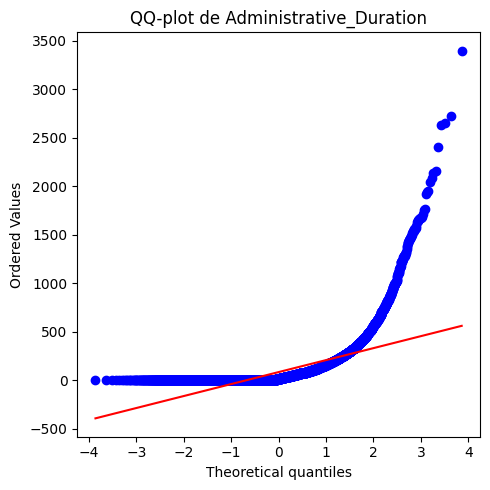

In [701]:
# chequeamos normalidad de distribucion para la variable
variable = "Administrative_Duration"

_, p = shapiro(df[variable])
print("p = %.4f" % (p))
# comparamos con el alpha
alpha = 0.05
if p > alpha:
    print("Se distribuyen normal")
else:
    print("No se distribuyen normal")

# QQ-plot 
plt.figure(figsize=(5,5))
stats.probplot(df[variable], dist="norm", plot=plt)
plt.title(f"QQ-plot de {variable}")
plt.tight_layout()
plt.show()

Se concluye y observa que la distribucion del atributo Administrative_Duration no es normal, por lo que descartamos la posibilidad de realizar un test parametrico como el t-Student y se validara la hipotesis con un no-parametrico como el test U...

In [702]:

# Separar los datos en dos grupos
grupo_no_compra = df[df["Revenue"] == False]["Administrative_Duration"]
grupo_compra = df[df["Revenue"] == True]["Administrative_Duration"]

print("TEST DE MANN-WHITNEY U - ADMINISTRATIVE_DURATION")

# Estadísticas descriptivas entre sesiones de compra y de no-compra
print("\nESTADISTICAS DESCRIPTIVAS:")
print(f"\nNO COMPRARON (n={len(grupo_no_compra)}):")
print(f"Media: {grupo_no_compra.mean():.2f} segundos")
print(f"Mediana: {grupo_no_compra.median():.2f} segundos")
print(f"Desvio estandar: {grupo_no_compra.std():.2f} segundos")

print(f"\nCOMPRARON (n={len(grupo_compra)}):")
print(f"Media: {grupo_compra.mean():.2f} segundos")
print(f"Mediana: {grupo_compra.median():.2f} segundos")
print(f"Desvio estandr: {grupo_compra.std():.2f} segundos")

# test de Mann-Whitney U
stat, p_value = stats.mannwhitneyu(grupo_no_compra, grupo_compra, alternative="two-sided")

print(f"\nRESULTADO DEL TEST U:")
print(f"Estadístico U: {stat:.2f}")
print(f"p-value: {p_value:.6f}")
print(f"Nivel de significancia alfa = 0.05")

if p_value < 0.05:
    print(f"Se RECHAZA la hipotesis nula")
    print(f"Existe diferencia estadisticamente significativa")

else:
    print(f"NO se rechaza la hipotesis nula")
    print(f"NO existe diferencia estadisticamente significativa")
    print(f"El tiempo en paginas administrativas es similar en ambos grupos")


TEST DE MANN-WHITNEY U - ADMINISTRATIVE_DURATION

ESTADISTICAS DESCRIPTIVAS:

NO COMPRARON (n=10297):
Media: 75.40 segundos
Mediana: 3.00 segundos
Desvio estandar: 171.70 segundos

COMPRARON (n=1908):
Media: 120.86 segundos
Mediana: 56.80 segundos
Desvio estandr: 200.55 segundos

RESULTADO DEL TEST U:
Estadístico U: 7372637.00
p-value: 0.000000
Nivel de significancia alfa = 0.05
Se RECHAZA la hipotesis nula
Existe diferencia estadisticamente significativa


Mediana de Administrative_Duration (Compra): 56.80 segundos
Mediana de Administrative_Duration (No Compra): 3.00 segundos


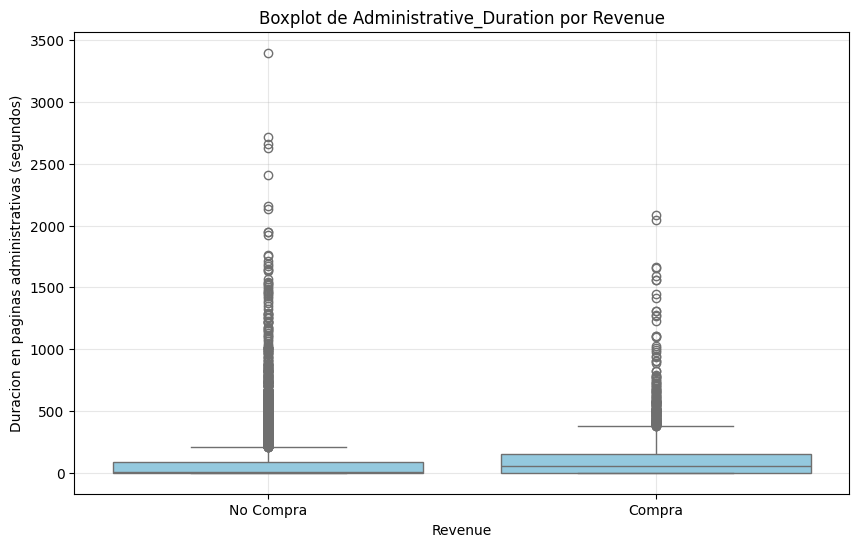

In [703]:
# Filtrar las sesiones con compra
grupo_compra = df[df["Revenue"] == True]["Administrative_Duration"]
grupo_no_compra = df[df["Revenue"] == False]["Administrative_Duration"]

# Calcular medianas (para mostrarlas en pantalla)
mediana_compra = grupo_compra.median()
mediana_no_compra = grupo_no_compra.median()

print(f"Mediana de Administrative_Duration (Compra): {mediana_compra:.2f} segundos")
print(f"Mediana de Administrative_Duration (No Compra): {mediana_no_compra:.2f} segundos")

# Boxplot con eje Y completo
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Revenue", y="Administrative_Duration",color="skyblue")
plt.title("Boxplot de Administrative_Duration por Revenue")
plt.xlabel("Revenue")
plt.xticks([0, 1], ["No Compra", "Compra"])
plt.ylabel("Duracion en paginas administrativas (segundos)")
plt.grid(True, alpha=0.3)
plt.show()

#### Planteo de Hipotesis : Multivariada 

##### Hipotesis 6: "Existen perfiles de compradores definidos o los compradores se comportan de manera similar"

La hipótesis nula (H0) es que no existen grupos diferenciados y que todas las sesiones de compradores provienen de una única distribución. 
La hipótesis alternativa (H1) es que existen 3 grupos en el dataset que estan definidos por un perfil/tipo de comprador.

Los perfiles de compradores son:
1. Perfil Explorador: Se caracteriza por un valor mas alto en "ProductRelated_Duration", que en "Administrative_Duration" e "Informational_Duration".
2. Perfil Nuevo o Desconfiado: Se caracteriza por valores mas altos en "Informational_Duration" y "Administrative_Duration", que en "ProductRelated_Duration".
3. Perfil Directo: Se caracteriza por un valor mas alto en "Administrative_Duration", comparado con los valores en "ProductRelated_Duration" e "Informational_Duration".







In [704]:
# Seleccionamos las columnas numericas para la normalizacion
numeric_cols = df.select_dtypes(include=np.number).columns

# Creamos un objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajustamos el scaler a los datos y transformamos los datos
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df.head()

# Separamos las variables de duracion
features = ["Administrative_Duration", "Informational_Duration", "ProductRelated_Duration"]
X = df[df["Revenue"] == True][features]


# Inicializamos KMeans con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X)
clusters_kmeans = kmeans.predict(X)

# Creamos un DataFrame con las features y los clusters asignados
cluster_df = X.copy()
cluster_df["Cluster"] = clusters_kmeans


# Imprimimos las sesiones de cada cluster
for cluster_num in range(3):
    print(f"\nCluster {cluster_num}:")
    print(f"Sesiones: {len(cluster_df[cluster_df["Cluster"] == cluster_num])}")
    # Mostramos las características promedio de cada cluster
    print("Caracteristicas promedio:")
    print(cluster_df[cluster_df["Cluster"] == cluster_num][features].mean())


Cluster 0:
Sesiones: 1681
Caracteristicas promedio:
Administrative_Duration    0.020515
Informational_Duration     0.010456
ProductRelated_Duration    0.025056
dtype: float64

Cluster 1:
Sesiones: 68
Caracteristicas promedio:
Administrative_Duration    0.080659
Informational_Duration     0.312545
ProductRelated_Duration    0.072644
dtype: float64

Cluster 2:
Sesiones: 159
Caracteristicas promedio:
Administrative_Duration    0.175355
Informational_Duration     0.037436
ProductRelated_Duration    0.056405
dtype: float64


Cluster 0:
ProductRelated_Duration (0.025) es el valor más alto de los tres.
Conclusión: Este cluster se alinea perfectamente con "Perfil Explorador", ya que son los usuarios que, en promedio, pasan más tiempo en páginas de productos.

Cluster 1:
Informational_Duration (0.312) es drásticamente más alto que los otros dos.
Conclusión: Este cluster representa a "Perfil Nuevo o Desconfiado". Son usuarios que pasan mucho tiempo en páginas informativas, probablemente buscando información, ayuda o validando la confianza del sitio antes de comprar.

Cluster 2:
Administrative_Duration (0.175) es notablemente el valor más alto.
Conclusión: Este cluster encaja con "Perfil Directo". Son usuarios que pasan la mayor parte de su tiempo en tareas administrativas, como iniciar sesión, configurar la cuenta o, más probablemente, en el proceso de pago.

Interpretamos que los resultados del clustering respaldan fuertemente la hipotesis planteada, el algoritmo K-Means encontro los 3 grupos que se corresponden con los teorizados. Sin embargo, aunque la interpretacion es clara, hay que darle un rigor estadistico para confirmar que las diferencias entre los promedios son estadisticamente significativas.

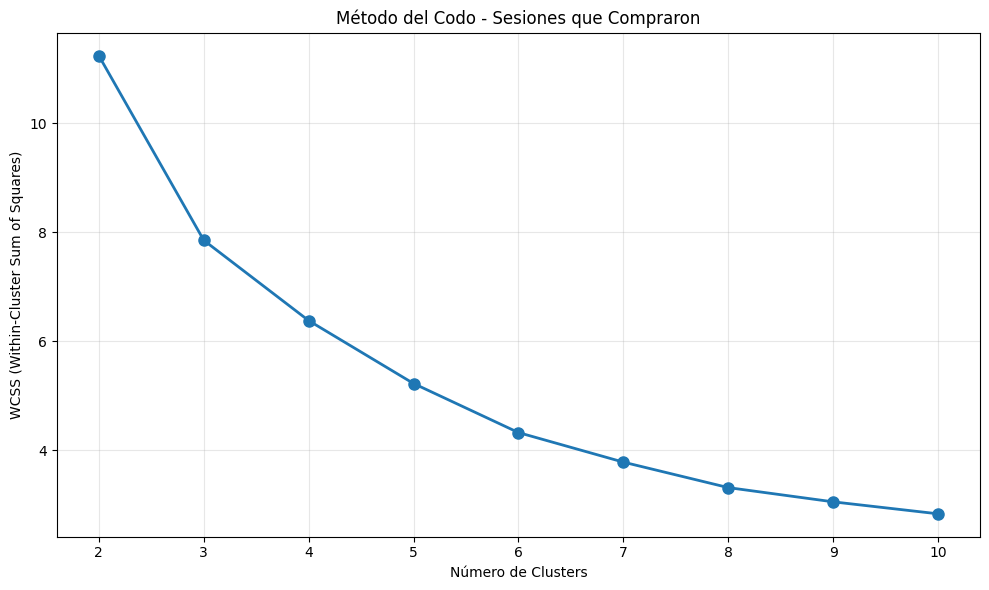

VALORES DE WCSS:
K = 2: WCSS = 11.23
K = 3: WCSS = 7.85
K = 4: WCSS = 6.38
K = 5: WCSS = 5.23
K = 6: WCSS = 4.33
K = 7: WCSS = 3.79
K = 8: WCSS = 3.32
K = 9: WCSS = 3.06
K = 10: WCSS = 2.84


In [705]:
# Calculamos K-Means para cada número de clusters y guardamos WCSS
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Graficamos el elbow plot
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), wcss, marker="o", linewidth=2, markersize=8)
plt.title("Método del Codo - Sesiones que Compraron")
plt.grid(True, alpha=0.3)
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.xticks(range(2, 11))
plt.tight_layout()
plt.show()


print("VALORES DE WCSS:")
for k, wcss_val in zip(range(2, 11), wcss):
    print(f"K = {k}: WCSS = {wcss_val:.2f}")

Elección del Número de Clusters (K)

Para determinar el número óptimo de clusters, se utilizó el Metodo del Codo (Elbow plot), que analiza la inercia (WCSS) a medida que aumenta el número de clusters (K). Los resultados muestran una reducción significativa de la inercia al pasar de K=2 (WCSS=11.23) a K=3 (WCSS=7.85). A partir de K=3, la disminución de la inercia se vuelve menos pronunciada, formando un "codo" en el gráfico.

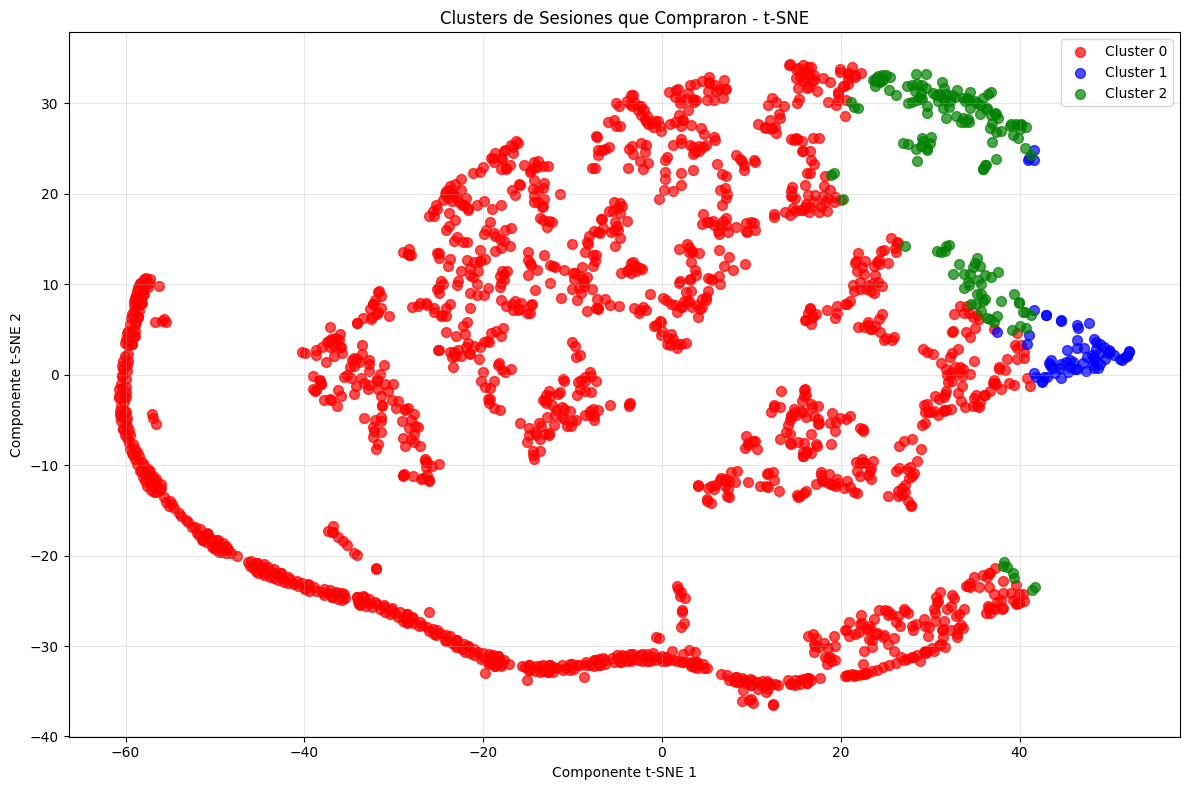

In [706]:
# Reducir la dimensionalidad de los datos usando t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(X)  # X ya contiene solo Revenue=True

# Crear un DataFrame con los resultados de t-SNE y los clusters
tsne_df = pd.DataFrame({
    "x": tsne_results[:, 0], 
    "y": tsne_results[:, 1], 
    "Cluster": clusters_kmeans,
    "Session": df[df["Revenue"] == True].index
})

# Graficar los resultados de t-SNE, coloreando los puntos según el cluster
plt.figure(figsize=(12, 8))
colors = ["red", "blue", "green"]

for cluster_num in range(3):
    cluster_data = tsne_df[tsne_df["Cluster"] == cluster_num]
    plt.scatter(cluster_data["x"], cluster_data["y"], 
                color=colors[cluster_num], 
                label=f"Cluster {cluster_num}",
                alpha=0.7,
                s=50)

plt.xlabel("Componente t-SNE 1")
plt.ylabel("Componente t-SNE 2")
plt.title("Clusters de Sesiones que Compraron - t-SNE")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Para confirmar que los perfiles de usuario (clusters) que hemos identificado son genuinamente distintos, realizamos un ANOVA. Este test nos permite determinar si las diferencias observadas en las duraciones promedio en paginas (Administrative, Informational, ProductRelated) entre los tres clusters son estadísticamente significativas o si podrían deberse al azar.

Para cada una de las tres variables de duración, planteamos las siguientes hipótesis:

Hipótesis Nula (H0): Las medias de la duración son iguales en los tres clusters. No hay diferencia real entre los grupos.

Hipótesis Alternativa (H1): Al menos una de las medias de la duración es diferente. Los grupos no se comportan de la misma manera.


In [707]:
# Lista de características para analizar
features_to_test = ["Administrative_Duration", "Informational_Duration", "ProductRelated_Duration"]
alpha = 0.05

for feature in features_to_test:
    
    print("Hipótesis Nula (H0): Las medias de la duración son iguales en los tres clusters.")
    print("Hipótesis Alternativa (H1): Al menos una de las medias de la duración es diferente.")

    # Extraer los datos de cada cluster para la feature actual
    cluster0 = cluster_df[cluster_df["Cluster"] == 0][feature]
    cluster1 = cluster_df[cluster_df["Cluster"] == 1][feature]
    cluster2 = cluster_df[cluster_df["Cluster"] == 2][feature]

    # Realizar el test ANOVA
    f_statistic, p_value = stats.f_oneway(cluster0, cluster1, cluster2)

    # Imprimir resultados
    print(f"Estadístico F: {f_statistic:.4f}")
    print(f"P-value: {p_value}")

    # Conclusión
    if p_value < alpha:
        print(f"Conclusión: Se rechaza la hipótesis nula (p < {alpha}).")
        print("Existe una diferencia estadísticamente significativa en las medias de los grupos.")
    else:
        print(f"Conclusión: No se puede rechazar la hipótesis nula (p >= {alpha}).")
        print("No hay evidencia de una diferencia significativa en las medias de los grupos.")
    
    print("=" * 30)
    print("\n")

Hipótesis Nula (H0): Las medias de la duración son iguales en los tres clusters.
Hipótesis Alternativa (H1): Al menos una de las medias de la duración es diferente.
Estadístico F: 1145.9313
P-value: 0.0
Conclusión: Se rechaza la hipótesis nula (p < 0.05).
Existe una diferencia estadísticamente significativa en las medias de los grupos.


Hipótesis Nula (H0): Las medias de la duración son iguales en los tres clusters.
Hipótesis Alternativa (H1): Al menos una de las medias de la duración es diferente.
Estadístico F: 2176.5187
P-value: 0.0
Conclusión: Se rechaza la hipótesis nula (p < 0.05).
Existe una diferencia estadísticamente significativa en las medias de los grupos.


Hipótesis Nula (H0): Las medias de la duración son iguales en los tres clusters.
Hipótesis Alternativa (H1): Al menos una de las medias de la duración es diferente.
Estadístico F: 118.2948
P-value: 3.747080190015324e-49
Conclusión: Se rechaza la hipótesis nula (p < 0.05).
Existe una diferencia estadísticamente signific

El p-value obtenido en el test es menor que nuestro nivel de significancia (alpha 0.05), rechazamos la hipótesis nula. Esto nos daría una fuerte evidencia de que los clusters representan perfiles de comportamiento verdaderamente distintos.

PERO... recordemos que ANOVA es un test parametrico, por lo cual para su validez se requieren cumplir los 3 supuestos:
- Normalidad
- Independencia
- Homocedasticidad

chequeemos a traves del Test de Levene, si existe igualdad de varianzas para las tres distribuciones de las variables "duration" (Homocedasticidad)

In [708]:
# Extraer las tres variables
adm_dur = df["Administrative_Duration"]
inf_dur = df["Informational_Duration"]
prod_dur = df["ProductRelated_Duration"]

# Test de Levene
stat, p_value = levene(adm_dur, inf_dur, prod_dur, center="median")

print("RESULTADO DEL TEST DE LEVENE")
print(f"Estadístico de Levene: {stat:.4f}")
print(f"p-value: {p_value:.6f}")
print(f"Nivel de significancia alfa = 0.05")

if p_value < 0.05:
    print("\nSe RECHAZA la hipótesis nula.")
    print("Las varianzas de las tres variables NO son iguales.")
else:
    print("\nNO se rechaza la hipótesis nula.")
    print("No hay evidencia suficiente para afirmar que las varianzas sean diferentes.")


RESULTADO DEL TEST DE LEVENE
Estadístico de Levene: 173.8704
p-value: 0.000000
Nivel de significancia alfa = 0.05

Se RECHAZA la hipótesis nula.
Las varianzas de las tres variables NO son iguales.


Bueno, comprobamos que no existe igualdad de varianzas para las tres variables que nos interesaban. Entonces debemos descartar todas las conclusiones sacadas a partir del test de ANOVA, y pasar a su alternativa no-parametrica: el test de Kruskal-Wallis.

In [709]:
# Lista de características para analizar
features_to_test = ["Administrative_Duration", "Informational_Duration", "ProductRelated_Duration"]
alpha = 0.05

for feature in features_to_test:
    print(f"Variable: {feature}")
    print("Hipótesis Nula (H0): Las medianas de la duración son iguales en los tres clusters.")
    print("Hipótesis Alternativa (H1): Al menos una mediana es diferente entre los clusters.")

    # Extraer los datos de cada cluster para la variable actual
    cluster0 = cluster_df[cluster_df["Cluster"] == 0][feature]
    cluster1 = cluster_df[cluster_df["Cluster"] == 1][feature]
    cluster2 = cluster_df[cluster_df["Cluster"] == 2][feature]

    # Realizar el test Kruskal-Wallis
    h_statistic, p_value = kruskal(cluster0, cluster1, cluster2)

    # Imprimir resultados
    print(f"Estadístico H (Kruskal-Wallis): {h_statistic:.4f}")
    print(f"p-value: {p_value:.6f}")

    # Conclusión
    if p_value < alpha:
        print(f"Se rechaza la hipótesis nula (p < {alpha}).")
        print("Existe una diferencia estadísticamente significativa en las medianas de al menos un cluster.")
    else:
        print(f"No se puede rechazar la hipótesis nula (p >= {alpha}).")
        print("No hay evidencia suficiente de diferencias significativas en las medianas entre los clusters.")

    print("=" * 60)
    print("\n")

Variable: Administrative_Duration
Hipótesis Nula (H0): Las medianas de la duración son iguales en los tres clusters.
Hipótesis Alternativa (H1): Al menos una mediana es diferente entre los clusters.
Estadístico H (Kruskal-Wallis): 491.7599
p-value: 0.000000
Se rechaza la hipótesis nula (p < 0.05).
Existe una diferencia estadísticamente significativa en las medianas de al menos un cluster.


Variable: Informational_Duration
Hipótesis Nula (H0): Las medianas de la duración son iguales en los tres clusters.
Hipótesis Alternativa (H1): Al menos una mediana es diferente entre los clusters.
Estadístico H (Kruskal-Wallis): 340.5399
p-value: 0.000000
Se rechaza la hipótesis nula (p < 0.05).
Existe una diferencia estadísticamente significativa en las medianas de al menos un cluster.


Variable: ProductRelated_Duration
Hipótesis Nula (H0): Las medianas de la duración son iguales en los tres clusters.
Hipótesis Alternativa (H1): Al menos una mediana es diferente entre los clusters.
Estadístico H 

Los resultados para los test de Kruskal fueron en todos los casos con p-value = 0. Por lo que podemos afirmar que existen diferencias significativas para los 3 clusters comparados por las 3 variables de interes. El problema ahora es que el test nos arroja diferencias, pero no a que cluster esta asociado...Digamos que si queremos ver CUALES clusters son diferentes vamos a hacer multiples pruebas U de Mann-Whitney para comparar todos los pares de grupos.

In [710]:
# Lista de variables a analizar
variables = ["Administrative_Duration", "Informational_Duration", "ProductRelated_Duration"]
alpha = 0.05 

for var in variables:
    print(f"\nVariable: {var}")
    print("-" * 40)
    
    cluster0 = cluster_df[cluster_df["Cluster"] == 0][var]
    cluster1 = cluster_df[cluster_df["Cluster"] == 1][var]
    cluster2 = cluster_df[cluster_df["Cluster"] == 2][var]
    
    # Comparar pares
    pares = [(0, 1), (0, 2), (1, 2)]
    for i, j in pares:
        if i == 0 and j == 1:
            data_i, data_j = cluster0, cluster1
        elif i == 0 and j == 2:
            data_i, data_j = cluster0, cluster2
        else:
            data_i, data_j = cluster1, cluster2
        
        # Realizar prueba U de Mann-Whitney
        stat, p_value = mannwhitneyu(data_i, data_j, alternative="two-sided")
        
        # Imprimir resultados
        print(f"Cluster {i} vs Cluster {j}:")
        print(f"  Estadístico U: {stat:.4f}")
        print(f"  p-value: {p_value:.6f}")
        
        # Conclusion
        if p_value < alpha:
            print(f"Diferencia estadísticamente significativa (p < {alpha:.2f})")
        else:
            print(f"No se rechaza la hipótesis nula (p >= {alpha:.2f})")
        print()


Variable: Administrative_Duration
----------------------------------------
Cluster 0 vs Cluster 1:
  Estadístico U: 24089.5000
  p-value: 0.000000
Diferencia estadísticamente significativa (p < 0.05)

Cluster 0 vs Cluster 2:
  Estadístico U: 852.0000
  p-value: 0.000000
Diferencia estadísticamente significativa (p < 0.05)

Cluster 1 vs Cluster 2:
  Estadístico U: 1544.0000
  p-value: 0.000000
Diferencia estadísticamente significativa (p < 0.05)


Variable: Informational_Duration
----------------------------------------
Cluster 0 vs Cluster 1:
  Estadístico U: 2.0000
  p-value: 0.000000
Diferencia estadísticamente significativa (p < 0.05)

Cluster 0 vs Cluster 2:
  Estadístico U: 92906.5000
  p-value: 0.000000
Diferencia estadísticamente significativa (p < 0.05)

Cluster 1 vs Cluster 2:
  Estadístico U: 10772.0000
  p-value: 0.000000
Diferencia estadísticamente significativa (p < 0.05)


Variable: ProductRelated_Duration
----------------------------------------
Cluster 0 vs Cluster 1:


La conclusion que nos arrojan los tests es que no solo existen 3 grupos, sino que cada grupo tiene un comportamiento de navegación único y significativamente diferente de los otros dos en todas las dimensiones de tiempo analizadas.

Esto confirma que los perfiles de comprador que teorizamos ("Explorador", "Nuevo o Desconfiado" y "Directo") no son una casualidad, sino que representan segmentos de usuarios reales y medibles.